<a href="https://colab.research.google.com/github/Hj-lh/House-Price-Prediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
df = pd.read_csv('train.csv')

In [90]:
df.head()

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price
0,199577,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0
1,217021,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0
2,308062,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0
3,212465,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0
4,60654,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271721 entries, 0 to 271720
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   house_id       271721 non-null  int64  
 1   date           271721 non-null  object 
 2   location       271721 non-null  object 
 3   type           271721 non-null  object 
 4   block          271721 non-null  object 
 5   street         271721 non-null  object 
 6   storey_range   271721 non-null  object 
 7   area_sqm       271721 non-null  float64
 8   flat_model     271721 non-null  object 
 9   commence_date  271721 non-null  int64  
 10  price          271721 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 22.8+ MB


In [92]:
df['block'].value_counts()

,count
block,
2,1277
1,1204
4,977
3,962
114,946
...,...
635B,1
632C,1
677A,1


In [93]:
df['location'].unique()

array(['Raleigh', 'Fresno', 'Tucson', 'Austin', 'Honolulu', 'Riverside',
       'Omaha', 'Washington', 'Albuquerque', 'Chicago', 'Tampa',
       'Milwaukee', 'Arlington', 'Pittsburgh', 'Boston', 'Sacramento',
       'Seatle', 'Miami', 'Minneapolis', 'Cleveland', 'Denver', 'Mesa',
       'Oakland', 'Atlanta', 'Portland', 'Baltimore'], dtype=object)

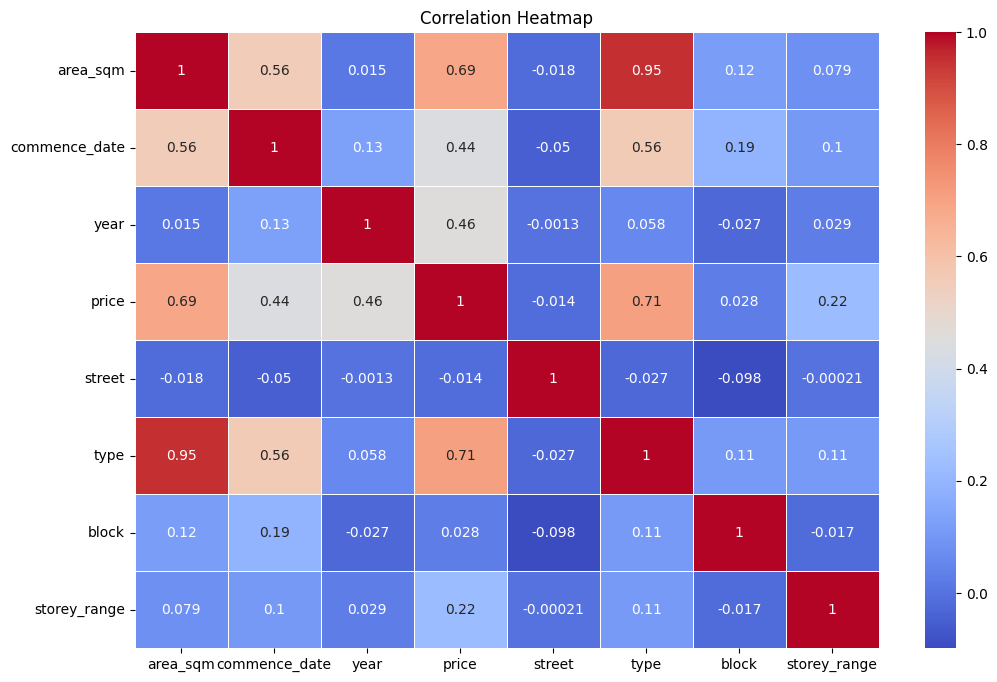

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convert 'date' to datetime and extract year and month
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Label encode categorical features
label_encoder = LabelEncoder()
for col in ['location', 'type', 'block', 'street', 'storey_range', 'flat_model']:
    df[col] = label_encoder.fit_transform(df[col])

# Select numerical features for correlation analysis, including label encoded categorical features
numerical_features = ['area_sqm', 'commence_date', 'year', 'price','street','type','block','storey_range']

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [95]:
df.head()

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price,year,month
0,199577,2006-09-01,19,4,34,26,2,110.0,3,2003,313000.0,2006,9
1,217021,2007-06-01,9,2,1445,102,2,64.0,13,1988,167000.0,2007,6
2,308062,2010-09-01,24,3,1092,146,3,92.0,10,1976,430000.0,2010,9
3,212465,2007-04-01,3,3,742,333,3,92.0,10,1977,303800.0,2007,4
4,60654,2001-10-01,10,3,1662,32,1,102.0,6,1998,212000.0,2001,10


In [96]:
columns_to_drop = ['month', 'date','street','storey_range']
df = df.drop(columns=columns_to_drop)


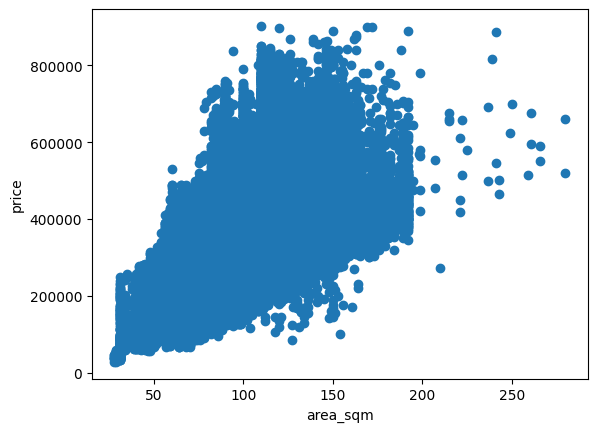

In [97]:
plt.ylabel("price")
plt.xlabel("area_sqm")
plt.scatter(x=df.area_sqm, y=df.price)


<Axes: xlabel='location', ylabel='price'>

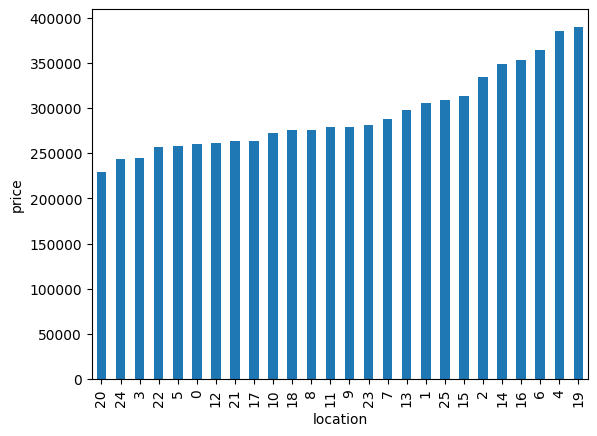

In [98]:
plt.ylabel("price")
df.groupby('location').price.mean().sort_values().plot(kind='bar')

In [99]:
df.columns

Index(['house_id', 'location', 'type', 'block', 'area_sqm', 'flat_model',
       'commence_date', 'price', 'year'],
      dtype='object')

In [100]:
train_cols = ['area_sqm','year', 'location', 'type', 'block', 'flat_model']
target_col = 'price'
train_cols

['area_sqm', 'year', 'location', 'type', 'block', 'flat_model']

In [101]:
X = df[train_cols]
y = df[target_col]


In [102]:
X.head()

,area_sqm,year,location,type,block,flat_model
0,110.0,2006,19,4,34,3
1,64.0,2007,9,2,1445,13
2,92.0,2010,24,3,1092,10
3,92.0,2007,3,3,742,10
4,102.0,2001,10,3,1662,6


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**MAE**:
Definition: Mean Absolute Error represents the average magnitude of errors in the model's predictions, without considering their direction (i.e., it doesn't matter whether the model underpredicts or overpredicts).
For example if the model predict 46000, it mean that the model is off by approximately $46000 to the correct price. This helps you understand how far off your predictions are in absolute terms, which is useful for understanding the general prediction error.

**RMSE**:
Definition: Root Mean Squared Error represents the square root of the average of the squared differences between actual and predicted values. Interpretation: RMSE penalizes larger errors more heavily than MAE due to the squaring. This metric is useful when you want to emphasize the impact of larger errors on the model's performance. An RMSE of 62,803.39 means that the model's predictions are off by

**R² (R-squared):**
Value: 0.685
Definition: R², or the coefficient of determination, represents the proportion of variance in the target variable (price) that is explained by the model. It ranges from 0 to 1, where 1 means perfect prediction and 0 means the model explains none of the variance.
Interpretation: An R² value of 0.685 means that your model explains approximately 68.5% of the variance in house prices. While this is a reasonable value, it also indicates that about 31.5% of the variance remains unexplained, suggesting there is still room for improvement.

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=32)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation results
print("Random Forest Regressor:")
print("-"*50)
print(f"MAE: {mae_rf:.2f}")
print("-"*50)
print(f"RMSE: {rmse_rf:.2f}")
print("-"*50)
print(f"R²: {r2_rf:.2f}")


Random Forest Regressor:
--------------------------------------------------
MAE: 16336.55
--------------------------------------------------
RMSE: 23084.41
--------------------------------------------------
R²: 0.96


In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=7)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = root_mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the evaluation results
print("Gradient Boosting Regressor:")
print("-"*50)
print(f"MAE: {mae_gb:.2f}")
print("-"*50)
print(f"RMSE: {rmse_gb:.2f}")
print("-"*50)
print(f"R²: {r2_gb:.2f}")


Gradient Boosting Regressor:
--------------------------------------------------
MAE: 26392.32
--------------------------------------------------
RMSE: 37318.89
--------------------------------------------------
R²: 0.89


In [85]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation results
print("XGBoost Regressor:")
print("-"*50)
print(f"MAE: {mae_xgb:.2f}")
print("-"*50)
print(f"RMSE: {rmse_xgb:.2f}")
print("-"*50)
print(f"R²: {r2_xgb:.2f}")


XGBoost Regressor:
--------------------------------------------------
MAE: 26625.16
--------------------------------------------------
RMSE: 37692.59
--------------------------------------------------
R²: 0.89


In [106]:
!pip install tqdm


**Going back to RandomForest**


In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterSampler
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import numpy as np
import time

# Define parameter
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt'],
}


rf = RandomForestRegressor(random_state=42)

# Use ParameterSampler to randomly sample parameter combinations
param_list = list(ParameterSampler(param_grid, n_iter=5, random_state=42))  # Reduced n_iter to 5


best_score = -np.inf
best_params = None
start_time = time.time()

for params in tqdm(param_list, desc="Tuning Progress"):
    rf.set_params(**params)

    try:

        scores = cross_val_score(rf, X_train, y_train, cv=2, n_jobs=-1)
        mean_score = np.mean(scores)

        if mean_score > best_score:
            best_score = mean_score
            best_params = params
    except ValueError as e:
        print(f"Skipping configuration due to an error: {e}")

end_time = time.time()

duration = end_time - start_time
print(f"\nTotal Duration for Tuning: {duration:.2f} seconds")
print(f"Best Parameters: {best_params}")

# Train the best model with all training data
rf.set_params(**best_params)
rf.fit(X_train, y_train)

# Predict using the best estimator
y_pred_best_rf = rf.predict(X_test)


mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = root_mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Tuned Random Forest Regressor:")
print("-"*50)
print(f"MAE: {mae_best_rf:.2f}")
print("-"*50)
print(f"RMSE: {rmse_best_rf:.2f}")
print("-"*50)
print(f"R²: {r2_best_rf:.2f}")


Tuning Progress: 100%|██████████| 5/5 [02:18<00:00, 27.65s/it]



Total Duration for Tuning: 138.24 seconds
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}
Tuned Random Forest Regressor:
--------------------------------------------------
MAE: 16340.83
--------------------------------------------------
RMSE: 23082.05
--------------------------------------------------
R²: 0.96


**Even with the Tuning it predict almost the same result So will use rf_model**

In [113]:
import pandas as pd

# test dataset
test_df = pd.read_csv('test.csv')


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['location', 'type', 'block', 'street', 'storey_range', 'flat_model']:
    test_df[col] = label_encoder.fit_transform(test_df[col])

test_df['date'] = pd.to_datetime(test_df['date'], format='%Y-%m')
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month


test_features = ['area_sqm', 'year', 'location', 'type', 'block', 'flat_model']
X_test = test_df[test_features]


In [124]:
test_df["price"] = rf_model.predict(test_df[test_features])


In [133]:
test_df[["house_id","price"]].head()

,house_id,price
0,2,124293.130952
1,5,149563.029762
2,22,163967.369048
3,23,163967.369048
4,28,163980.511905


In [127]:
submission = test_df[['house_id', 'price']]

In [129]:
test_df.price.describe()

,price
count,67930.000000
mean,281233.265617
std,110081.034668
min,37927.283202
25%,196873.736389
50%,263364.461538
75%,349881.418333
max,848810.000000


In [131]:
df.price.describe()

,price
count,271721.000000
mean,281197.589537
std,112160.993184
min,28000.000000
25%,195000.000000
50%,263000.000000
75%,350000.000000
max,903000.000000


In [136]:
submission.to_csv('submission.csv', index=False)

In [137]:
!ls


best_random_forest_model.joblib  sample_data		submission.csv	train.csv
feature_importance.png		 sample_submission.csv	test.csv
